In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df = pd.read_csv(r"C:\Users\amnaj\OneDrive\Desktop\ARTIFICIAL INTELLIGENCE\retail_store_sales.csv")
print(df)

      Transaction ID Customer ID       Category          Item  Price Per Unit  \
0        TXN_6867343     CUST_09     Patisserie   Item_10_PAT            18.5   
1        TXN_3731986     CUST_22  Milk Products  Item_17_MILK            29.0   
2        TXN_9303719     CUST_02       Butchers   Item_12_BUT            21.5   
3        TXN_9458126     CUST_06      Beverages   Item_16_BEV            27.5   
4        TXN_4575373     CUST_05           Food   Item_6_FOOD            12.5   
...              ...         ...            ...           ...             ...   
12570    TXN_9347481     CUST_18     Patisserie   Item_23_PAT            38.0   
12571    TXN_4009414     CUST_03      Beverages    Item_2_BEV             6.5   
12572    TXN_5306010     CUST_11       Butchers    Item_7_BUT            14.0   
12573    TXN_5167298     CUST_04      Furniture    Item_7_FUR            14.0   
12574    TXN_2407494     CUST_23           Food   Item_9_FOOD            17.0   

       Quantity  Total Spen

In [17]:
df.head()

,Transaction ID,Customer ID,Category,Item,Price Per Unit,Quantity,Total Spent,Payment Method,Location,Transaction Date,Discount Applied
0,TXN_6867343,CUST_09,Patisserie,Item_10_PAT,18.5,10.0,185.0,Digital Wallet,Online,2024-04-08,True
1,TXN_3731986,CUST_22,Milk Products,Item_17_MILK,29.0,9.0,261.0,Digital Wallet,Online,2023-07-23,True
2,TXN_9303719,CUST_02,Butchers,Item_12_BUT,21.5,2.0,43.0,Credit Card,Online,2022-10-05,False
3,TXN_9458126,CUST_06,Beverages,Item_16_BEV,27.5,9.0,247.5,Credit Card,Online,2022-05-07,NaN
4,TXN_4575373,CUST_05,Food,Item_6_FOOD,12.5,7.0,87.5,Digital Wallet,Online,2022-10-02,False


In [18]:
df.columns

Index(['Transaction ID', 'Customer ID', 'Category', 'Item', 'Price Per Unit',
       'Quantity', 'Total Spent', 'Payment Method', 'Location',
       'Transaction Date', 'Discount Applied'],
      dtype='object')

In [4]:
df.shape

(12575, 11)

In [5]:
def detect_outlier(data):
    Q1 = np.percentile(data,25)
    print("First Quantifier",Q1)
    Q3 = np.percentile(data,75)
    print("3rd Quantifier",Q3)
    IQR = Q3-Q1
    print(IQR)
    lower_bound = Q1 -1.5*IQR
    upper_bound = Q3+ 1.5*IQR
    print("Lower_bound",lower_bound)
    print("upper_bound",upper_bound)
    outlier = [x for x in data if x < lower_bound or x> upper_bound]
    return outlier,lower_bound,upper_bound

In [6]:
outliers, lower, upper = detect_outlier(df["Total Spent"])

print("Outliers:", outliers[:10])   # show first 10 outliers
print("Number of outliers:", len(outliers))


First Quantifier nan
3rd Quantifier nan
nan
Lower_bound nan
upper_bound nan
Outliers: []
Number of outliers: 0


In [26]:
df["Total Spent"] = df["Total Spent"]
outlier,lb1,ub1= detect_outlier(df["Total Spent"])

First Quantifier nan
3rd Quantifier nan
nan
Lower_bound nan
upper_bound nan


In [30]:
Q1= df["Total Spent"].quantile(0.25)
Q3 = df["Total Spent"].quantile(0.75)
IQR = Q3 - Q1
lower = Q1-1.5*IQR
upper = Q3+1.5* IQR
df_no_outliers = df[(df["Total Spent"] >= lower) & (df["Total Spent"]<= upper)]
print(df_no_outliers)

KeyError: 'Total Spent'

In [31]:
print("Original shape:", df.shape)
print("After removing outliers:", df_no_outliers.shape)
print("Outliers removed:", df.shape[0] - df_no_outliers.shape[0])


Original shape: (87489, 8)


NameError: name 'df_no_outliers' is not defined

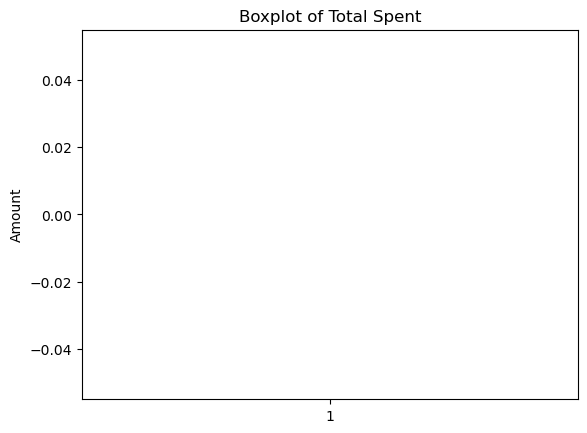

In [21]:
import matplotlib.pyplot as plt

plt.boxplot(df["Total Spent"])
plt.title("Boxplot of Total Spent")
plt.ylabel("Amount")
plt.show()

In [24]:

df['log_Total_spent'] = np.log1p(df['Total Spent'])
print(df[['log_Total_spent']])

       log_Total_spent
0             5.225747
1             5.568345
2             3.784190
3             5.515443
4             4.483003
...                ...
12570         5.030438
12571         4.085976
12572         4.948760
12573         4.442651
12574         3.951244

[12575 rows x 1 columns]


In [33]:
df.dtypes

name           object
author         object
narrator       object
time           object
releasedate    object
language       object
stars          object
price          object
dtype: object

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df = pd.read_csv(r"C:\Users\amnaj\OneDrive\Desktop\ARTIFICIAL INTELLIGENCE\retail_store_sales.csv")
print(df)

      Transaction ID Customer ID       Category          Item  Price Per Unit  \
0        TXN_6867343     CUST_09     Patisserie   Item_10_PAT            18.5   
1        TXN_3731986     CUST_22  Milk Products  Item_17_MILK            29.0   
2        TXN_9303719     CUST_02       Butchers   Item_12_BUT            21.5   
3        TXN_9458126     CUST_06      Beverages   Item_16_BEV            27.5   
4        TXN_4575373     CUST_05           Food   Item_6_FOOD            12.5   
...              ...         ...            ...           ...             ...   
12570    TXN_9347481     CUST_18     Patisserie   Item_23_PAT            38.0   
12571    TXN_4009414     CUST_03      Beverages    Item_2_BEV             6.5   
12572    TXN_5306010     CUST_11       Butchers    Item_7_BUT            14.0   
12573    TXN_5167298     CUST_04      Furniture    Item_7_FUR            14.0   
12574    TXN_2407494     CUST_23           Food   Item_9_FOOD            17.0   

       Quantity  Total Spen

In [35]:
df.dtypes

Transaction ID       object
Customer ID          object
Category             object
Item                 object
Price Per Unit      float64
Quantity            float64
Total Spent         float64
Payment Method       object
Location             object
Transaction Date     object
Discount Applied     object
dtype: object

In [36]:
df["Payment Method"].value_counts()

Payment Method
Cash              4310
Digital Wallet    4144
Credit Card       4121
Name: count, dtype: int64

In [38]:
pd.get_dummies(df["Payment Method"]).head()

,Cash,Credit Card,Digital Wallet
0,False,False,True
1,False,False,True
2,False,True,False
3,False,True,False
4,False,False,True


In [40]:
df_encoding = pd.get_dummies(df)
print(df_encoding.head())
    

   Price Per Unit  Quantity  Total Spent  Transaction ID_TXN_1002182  \
0            18.5      10.0        185.0                       False   
1            29.0       9.0        261.0                       False   
2            21.5       2.0         43.0                       False   
3            27.5       9.0        247.5                       False   
4            12.5       7.0         87.5                       False   

   Transaction ID_TXN_1003865  Transaction ID_TXN_1003940  \
0                       False                       False   
1                       False                       False   
2                       False                       False   
3                       False                       False   
4                       False                       False   

   Transaction ID_TXN_1004091  Transaction ID_TXN_1004124  \
0                       False                       False   
1                       False                       False   
2                

In [41]:
from sklearn.preprocessing import LabelEncoder

In [43]:
df["Category"].value_counts()

Category
Electric household essentials         1591
Furniture                             1591
Food                                  1588
Milk Products                         1584
Butchers                              1568
Beverages                             1567
Computers and electric accessories    1558
Patisserie                            1528
Name: count, dtype: int64

In [44]:
df["Location"].value_counts()

Location
Online      6354
In-store    6221
Name: count, dtype: int64

In [45]:
le = LabelEncoder()
le.fit_transform(["Online","In-store"])

array([1, 0])

In [47]:
df["Location"]= df["Location"].map({'Online':0,
                                    'In-store':1})
print(df["Location"])

0        0
1        0
2        0
3        0
4        0
        ..
12570    1
12571    0
12572    0
12573    0
12574    0
Name: Location, Length: 12575, dtype: int64


In [48]:
df.nunique()

Transaction ID      12575
Customer ID            25
Category                8
Item                  200
Price Per Unit         25
Quantity               10
Total Spent           227
Payment Method          3
Location                2
Transaction Date     1114
Discount Applied        2
dtype: int64

In [60]:
df["Item"].value_counts()

Item
Item_2_BEV      126
Item_25_FUR     113
Item_11_FUR     110
Item_16_MILK    109
Item_1_MILK     109
               ... 
Item_5_BEV        7
Item_13_BEV       7
Item_13_FUR       7
Item_21_PAT       6
Item_3_EHE        5
Name: count, Length: 200, dtype: int64

In [61]:
temp = df["Item"].value_counts()
print(temp.head())

Item
Item_2_BEV      126
Item_25_FUR     113
Item_11_FUR     110
Item_16_MILK    109
Item_1_MILK     109
Name: count, dtype: int64


In [64]:
# count frequency of each Item
temp = df["Item"].value_counts().to_dict()

# map counts back to the column
df["Item_count"] = df["Item"].map(temp)

print(df[["Item", "Item_count"]].head())


           Item  Item_count
0   Item_10_PAT        29.0
1  Item_17_MILK        75.0
2   Item_12_BUT        90.0
3   Item_16_BEV        75.0
4   Item_6_FOOD        67.0


In [69]:
df["Item"] = df["Item"].where(df["Item_count"] >= 10, "other")
print(df["Item"])


0         Item_10_PAT
1        Item_17_MILK
2         Item_12_BUT
3         Item_16_BEV
4         Item_6_FOOD
             ...     
12570     Item_23_PAT
12571      Item_2_BEV
12572      Item_7_BUT
12573      Item_7_FUR
12574     Item_9_FOOD
Name: Item, Length: 12575, dtype: object


In [59]:
import numpy as np

counts = df["Transaction ID"].value_counts()
df["Transaction ID"] = np.where(df["Transaction ID"].isin(counts[counts <1].index), 
                                "other", 
                                df["Transaction ID"])
print(df["Transaction ID"])


0        other
1        other
2        other
3        other
4        other
         ...  
12570    other
12571    other
12572    other
12573    other
12574    other
Name: Transaction ID, Length: 12575, dtype: object


In [12]:
import matplotlib.pyplot as plt
df1 = pd.read_csv(r"C:\Users\amnaj\OneDrive\Desktop\ARTIFICIAL INTELLIGENCE\seattle-weather.csv")
print(df1)

            date  precipitation  temp_max  temp_min  wind  weather
0     2012-01-01            0.0      12.8       5.0   4.7  drizzle
1     2012-01-02           10.9      10.6       2.8   4.5     rain
2     2012-01-03            0.8      11.7       7.2   2.3     rain
3     2012-01-04           20.3      12.2       5.6   4.7     rain
4     2012-01-05            1.3       8.9       2.8   6.1     rain
...          ...            ...       ...       ...   ...      ...
1456  2015-12-27            8.6       4.4       1.7   2.9     rain
1457  2015-12-28            1.5       5.0       1.7   1.3     rain
1458  2015-12-29            0.0       7.2       0.6   2.6      fog
1459  2015-12-30            0.0       5.6      -1.0   3.4      sun
1460  2015-12-31            0.0       5.6      -2.1   3.5      sun

[1461 rows x 6 columns]


In [13]:
df1.head()

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain


In [14]:
df1.value_counts()

date        precipitation  temp_max  temp_min  wind  weather
2015-12-31  0.0            5.6       -2.1      3.5   sun        1
2012-01-01  0.0            12.8       5.0      4.7   drizzle    1
2012-01-02  10.9           10.6       2.8      4.5   rain       1
2012-01-03  0.8            11.7       7.2      2.3   rain       1
2012-01-04  20.3           12.2       5.6      4.7   rain       1
                                                               ..
2012-01-10  1.0            6.1        0.6      3.4   rain       1
2012-01-09  4.3            9.4        5.0      3.4   rain       1
2012-01-08  0.0            10.0       2.8      2.0   sun        1
2012-01-07  0.0            7.2        2.8      2.3   rain       1
2012-01-06  2.5            4.4        2.2      2.2   rain       1
Name: count, Length: 1461, dtype: int64

df1.columns

In [15]:
bins = [0,5,10,15]
group = ['low','high','extreme']
df1['temp_max_category'] = pd.cut(df1['temp_max'],bins,labels=group)


In [17]:
df1[['temp_max','temp_max_category']].head()

,temp_max,temp_max_category
0,12.8,extreme
1,10.6,extreme
2,11.7,extreme
3,12.2,extreme
4,8.9,high


In [18]:
def detect_outlier(data):
    Q1 = np.percentile(data,25)
    print("First Quantifier",Q1)
    Q3 = np.percentile(data,75)
    print("3rd Quantifier",Q3)
    IQR = Q3-Q1
    print(IQR)
    lower_bound = Q1 -1.5*IQR
    upper_bound = Q3+ 1.5*IQR
    print("Lower_bound",lower_bound)
    print("upper_bound",upper_bound)
    outlier = [x for x in data if x < lower_bound or x> upper_bound]
    return outlier,lower_bound,upper_bound

In [19]:
outliers, lower, upper = detect_outlier(df1["precipitation"])

print("Outliers:", outliers[:10])   # show first 10 outliers
print("Number of outliers:", len(outliers))


First Quantifier 0.0
3rd Quantifier 2.8
2.8
Lower_bound -4.199999999999999
upper_bound 6.999999999999999
Outliers: [10.9, 20.3, 8.1, 19.8, 15.2, 13.5, 8.6, 8.1, 27.7, 13.5]
Number of outliers: 206


Text(0, 0.5, 'precipitation')

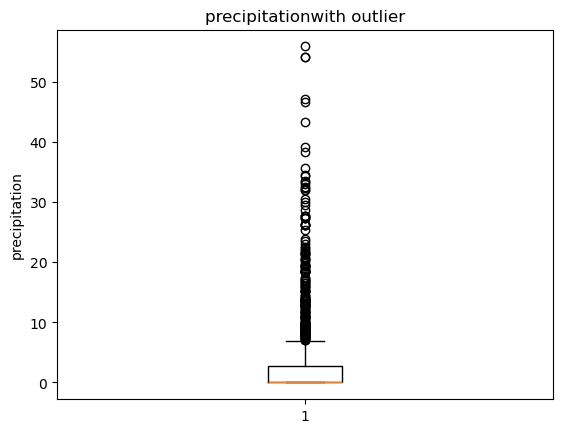

In [20]:
import matplotlib.pyplot as plt
plt.boxplot(df1["precipitation"])
plt.title("precipitationwith outlier")
plt.ylabel("precipitation")

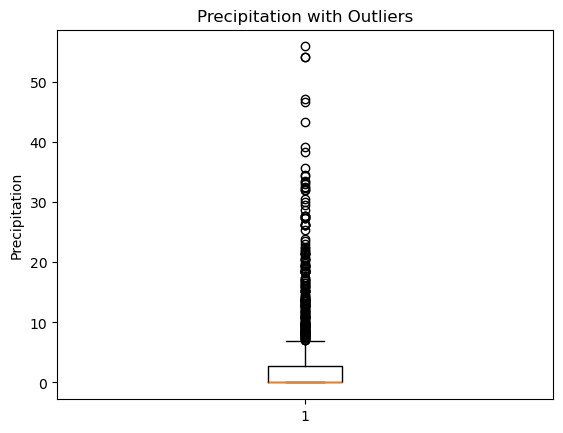

In [21]:
import matplotlib.pyplot as plt

plt.boxplot(df1["precipitation"])   # ✅ actual column values, not a string
plt.title("Precipitation with Outliers")
plt.ylabel("Precipitation")
plt.show()


In [23]:
Q1= df1["precipitation"].quantile(0.25)
Q3 = df1["precipitation"].quantile(0.75)
IQR = Q3 - Q1
lower = Q1-1.5*IQR
upper = Q3+1.5* IQR
df1_no_outliers = df1[(df1["precipitation"] >= lower) & (df1["precipitation"]<= upper)]
print(df1_no_outliers)

            date  precipitation  temp_max  temp_min  wind  weather  \
0     2012-01-01            0.0      12.8       5.0   4.7  drizzle   
2     2012-01-03            0.8      11.7       7.2   2.3     rain   
4     2012-01-05            1.3       8.9       2.8   6.1     rain   
5     2012-01-06            2.5       4.4       2.2   2.2     rain   
6     2012-01-07            0.0       7.2       2.8   2.3     rain   
...          ...            ...       ...       ...   ...      ...   
1455  2015-12-26            0.0       4.4       0.0   2.5      sun   
1457  2015-12-28            1.5       5.0       1.7   1.3     rain   
1458  2015-12-29            0.0       7.2       0.6   2.6      fog   
1459  2015-12-30            0.0       5.6      -1.0   3.4      sun   
1460  2015-12-31            0.0       5.6      -2.1   3.5      sun   

     temp_max_category  
0              extreme  
2              extreme  
4                 high  
5                  low  
6                 high  
...      

{'whiskers': [<matplotlib.lines.Line2D at 0x2c92ef065d0>,
 'caps': [<matplotlib.lines.Line2D at 0x2c92ef06850>,
 'boxes': [<matplotlib.lines.Line2D at 0x2c92ef06490>],
 'medians': [<matplotlib.lines.Line2D at 0x2c92ef06ad0>],
 'fliers': [<matplotlib.lines.Line2D at 0x2c92ef06c10>],
 'means': []}

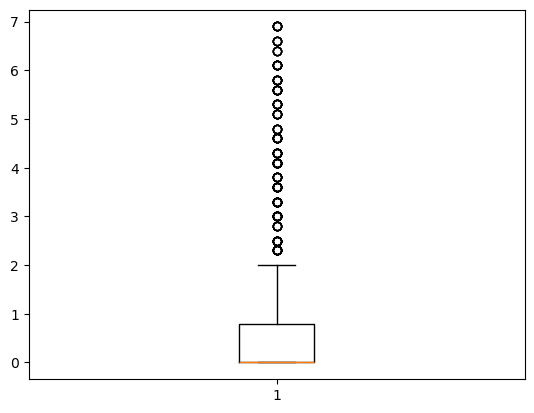

In [25]:
plt.boxplot(df1_no_outliers["precipitation"])

In [26]:

df1['log_precipitation'] = np.log1p(df1['precipitation'])
print(df1[['log_precipitation']])

      log_precipitation
0              0.000000
1              2.476538
2              0.587787
3              3.058707
4              0.832909
...                 ...
1456           2.261763
1457           0.916291
1458           0.000000
1459           0.000000
1460           0.000000

[1461 rows x 1 columns]


In [28]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df1["precipitation_encoded"] = le.fit_transform(df1["precipitation"])
df1["temp_max_encoded"] = le.fit_transform(df1["temp_max"])
print(df1[["precipitation_encoded","temp_max_encoded"]])

      precipitation_encoded  temp_max_encoded
0                         0                25
1                        43                21
2                         3                23
3                        74                24
4                         5                18
...                     ...               ...
1456                     34                10
1457                      6                11
1458                      0                15
1459                      0                12
1460                      0                12

[1461 rows x 2 columns]


In [29]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df1[["temp_max_norm","temp_min_norm"]]= scaler.fit_transform(df1[["temp_max","temp_min"]])
print(df1[["temp_max_norm","temp_min_norm"]])

      temp_max_norm  temp_min_norm
0          0.387097       0.476378
1          0.327957       0.389764
2          0.357527       0.562992
3          0.370968       0.500000
4          0.282258       0.389764
...             ...            ...
1456       0.161290       0.346457
1457       0.177419       0.346457
1458       0.236559       0.303150
1459       0.193548       0.240157
1460       0.193548       0.196850

[1461 rows x 2 columns]


In [30]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df1[["temp_max_norm","temp_min_norm"]] = scaler.fit_transform(df1[["temp_max","temp_min"]])
print(df1[["temp_max_norm","temp_min_norm"]])

      temp_max_norm  temp_min_norm
0         -0.495299      -0.644212
1         -0.794731      -1.082347
2         -0.645015      -0.206077
3         -0.576962      -0.524720
4         -1.026111      -1.082347
...             ...            ...
1456      -1.638585      -1.301414
1457      -1.556922      -1.301414
1458      -1.257490      -1.520481
1459      -1.475259      -1.839125
1460      -1.475259      -2.058192

[1461 rows x 2 columns]


In [32]:
outliers, lower, upper = detect_outlier(df1["wind"])

print("Outliers:", outliers[:10])   # show first 10 outliers
print("Number of outliers:", len(outliers))


First Quantifier 2.2
3rd Quantifier 4.0
1.7999999999999998
Lower_bound -0.49999999999999956
upper_bound 6.699999999999999
Outliers: [8.2, 8.1, 7.5, 7.0, 7.0, 6.8, 8.0, 7.3, 9.5, 7.3]
Number of outliers: 34


{'whiskers': [<matplotlib.lines.Line2D at 0x2c92fbff890>,
 'caps': [<matplotlib.lines.Line2D at 0x2c92fbffb10>,
 'boxes': [<matplotlib.lines.Line2D at 0x2c92fbff750>],
 'medians': [<matplotlib.lines.Line2D at 0x2c92fbffd90>],
 'fliers': [<matplotlib.lines.Line2D at 0x2c92fbffed0>],
 'means': []}

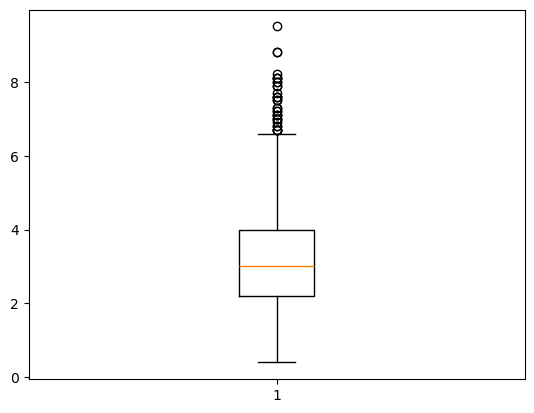

In [33]:
plt.boxplot(df1["wind"])

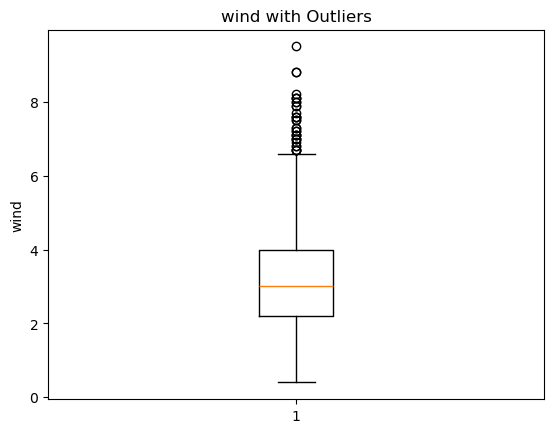

In [34]:
plt.boxplot(df1["wind"])   # ✅ actual column values, not a string
plt.title("wind with Outliers")
plt.ylabel("wind")
plt.show()

In [35]:
Q1= df1["wind"].quantile(0.25)
Q3 = df1["wind"].quantile(0.75)
IQR = Q3 - Q1
lower = Q1-1.5*IQR
upper = Q3+1.5* IQR
df1_no_outliers = df1[(df1["wind"] >= lower) & (df1["wind"]<= upper)]
print(df1_no_outliers)

            date  precipitation  temp_max  temp_min  wind  weather  \
0     2012-01-01            0.0      12.8       5.0   4.7  drizzle   
1     2012-01-02           10.9      10.6       2.8   4.5     rain   
2     2012-01-03            0.8      11.7       7.2   2.3     rain   
3     2012-01-04           20.3      12.2       5.6   4.7     rain   
4     2012-01-05            1.3       8.9       2.8   6.1     rain   
...          ...            ...       ...       ...   ...      ...   
1456  2015-12-27            8.6       4.4       1.7   2.9     rain   
1457  2015-12-28            1.5       5.0       1.7   1.3     rain   
1458  2015-12-29            0.0       7.2       0.6   2.6      fog   
1459  2015-12-30            0.0       5.6      -1.0   3.4      sun   
1460  2015-12-31            0.0       5.6      -2.1   3.5      sun   

     temp_max_category  log_precipitation  precipitation_encoded  \
0              extreme           0.000000                      0   
1              extreme 

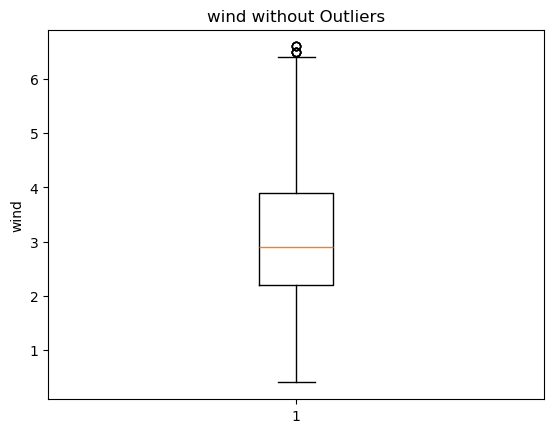

In [36]:
plt.boxplot(df1_no_outliers["wind"])
plt.title("wind without Outliers")
plt.ylabel("wind")
plt.show()

In [37]:
df1['log_wind'] = np.log1p(df1['wind'])
print(df1[['log_wind']])

      log_wind
0     1.740466
1     1.704748
2     1.193922
3     1.740466
4     1.960095
...        ...
1456  1.360977
1457  0.832909
1458  1.280934
1459  1.481605
1460  1.504077

[1461 rows x 1 columns]


In [38]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df1["wind_encoded"] = le.fit_transform(df1["wind"])
df1["temp_max_encoded"] = le.fit_transform(df1["temp_max"])
print(df1[["wind_encoded","temp_max_encoded"]])

      wind_encoded  temp_max_encoded
0               43                25
1               41                21
2               19                23
3               43                24
4               57                18
...            ...               ...
1456            25                10
1457             9                11
1458            22                15
1459            30                12
1460            31                12

[1461 rows x 2 columns]


In [39]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df1[["wind_norm","temp_min_norm"]]= scaler.fit_transform(df1[["wind","temp_min"]])
print(df1[["wind_norm","temp_min_norm"]])

      wind_norm  temp_min_norm
0      0.472527       0.476378
1      0.450549       0.389764
2      0.208791       0.562992
3      0.472527       0.500000
4      0.626374       0.389764
...         ...            ...
1456   0.274725       0.346457
1457   0.098901       0.346457
1458   0.241758       0.303150
1459   0.329670       0.240157
1460   0.340659       0.196850

[1461 rows x 2 columns]


In [43]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df1[["wind"]] = scaler.fit_transform(df1[["wind"]])
print(df1[["wind"]])

          wind
0     1.014980
1     0.875833
2    -0.654780
3     1.014980
4     1.989006
...        ...
1456 -0.237340
1457 -1.350513
1458 -0.446060
1459  0.110527
1460  0.180100

[1461 rows x 1 columns]
